In [1]:
import json

In [2]:
with open("./final results/benchmark-results-DYTAS[navigation=All,sorting=Khan,multicore=UseAllCores].json") as f:
    data = json.load(f)

In [3]:
# data

In [4]:
import pandas as pd

In [5]:
df = pd.json_normalize(data, sep='.')

In [6]:
df.head()

,dag,system,scheduler,completed,makespan,exec_time,run_stats.scheduling_time,run_stats.total_task_time,run_stats.total_network_traffic,run_stats.total_network_time,...,run_stats.max_used_memory,run_stats.max_cpu_utilization,run_stats.max_memory_utilization,run_stats.cpu_utilization,run_stats.memory_utilization,run_stats.used_resource_count,run_stats.cpu_utilization_used,run_stats.memory_utilization_used,run_stats.cpu_utilization_active,run_stats.memory_utilization_active
0,1000-epigenomics-workflow,cluster-hom,"DYTAS[navigation=All,sorting=Khan,multicore=Us...",True,3423.205481,0.495602,0.369394,5.779685e+04,1.713276e+04,1.602221,...,0,0.443580,0.0,0.065696,0.0,16,0.139536,0.0,0.721062,0.0
1,1000-genome-workflow,cluster-hom,"DYTAS[navigation=All,sorting=Khan,multicore=Us...",True,2400.471000,0.445980,0.309346,1.664369e+05,1.079475e+06,86.881739,...,0,0.996109,0.0,0.269786,0.0,33,0.269786,0.0,0.552956,0.0
2,1000-montage-workflow,cluster-hom,"DYTAS[navigation=All,sorting=Khan,multicore=Us...",True,9518.137897,0.647550,0.402622,4.311437e+05,6.362887e+04,5.397309,...,0,0.385214,0.0,0.176253,0.0,14,0.431401,0.0,0.443237,0.0
3,10000-montage-workflow,cluster-hom,"DYTAS[navigation=All,sorting=Khan,multicore=Us...",True,66746.734388,61.367740,57.210869,3.339446e+06,8.593297e+05,72.845279,...,0,0.996109,0.0,0.194675,0.0,33,0.194675,0.0,0.207045,0.0
4,101000-genome-workflow,cluster-hom,"DYTAS[navigation=All,sorting=Khan,multicore=Us...",True,67711.604133,2075.985469,2036.167232,1.648880e+07,1.086889e+08,8819.338345,...,0,0.996109,0.0,0.947530,0.0,33,0.947530,0.0,0.993944,0.0


In [7]:
nodes_regex = r"(\d+)-" # Extract node count regex

In [8]:
df["nodes"] = df["dag"].str.extract(nodes_regex)

In [9]:
workflow_regex = r'^\d+-(\w+)-workflow$'

In [10]:
df["workflow"] = df["dag"].str.extract(workflow_regex)

In [11]:
df.head()

,dag,system,scheduler,completed,makespan,exec_time,run_stats.scheduling_time,run_stats.total_task_time,run_stats.total_network_traffic,run_stats.total_network_time,...,run_stats.max_memory_utilization,run_stats.cpu_utilization,run_stats.memory_utilization,run_stats.used_resource_count,run_stats.cpu_utilization_used,run_stats.memory_utilization_used,run_stats.cpu_utilization_active,run_stats.memory_utilization_active,nodes,workflow
0,1000-epigenomics-workflow,cluster-hom,"DYTAS[navigation=All,sorting=Khan,multicore=Us...",True,3423.205481,0.495602,0.369394,5.779685e+04,1.713276e+04,1.602221,...,0.0,0.065696,0.0,16,0.139536,0.0,0.721062,0.0,1000,epigenomics
1,1000-genome-workflow,cluster-hom,"DYTAS[navigation=All,sorting=Khan,multicore=Us...",True,2400.471000,0.445980,0.309346,1.664369e+05,1.079475e+06,86.881739,...,0.0,0.269786,0.0,33,0.269786,0.0,0.552956,0.0,1000,genome
2,1000-montage-workflow,cluster-hom,"DYTAS[navigation=All,sorting=Khan,multicore=Us...",True,9518.137897,0.647550,0.402622,4.311437e+05,6.362887e+04,5.397309,...,0.0,0.176253,0.0,14,0.431401,0.0,0.443237,0.0,1000,montage
3,10000-montage-workflow,cluster-hom,"DYTAS[navigation=All,sorting=Khan,multicore=Us...",True,66746.734388,61.367740,57.210869,3.339446e+06,8.593297e+05,72.845279,...,0.0,0.194675,0.0,33,0.194675,0.0,0.207045,0.0,10000,montage
4,101000-genome-workflow,cluster-hom,"DYTAS[navigation=All,sorting=Khan,multicore=Us...",True,67711.604133,2075.985469,2036.167232,1.648880e+07,1.086889e+08,8819.338345,...,0.0,0.947530,0.0,33,0.947530,0.0,0.993944,0.0,101000,genome


In [12]:
df["nodes"] = df["nodes"].astype(int)

In [13]:
df = df.sort_values("nodes")

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

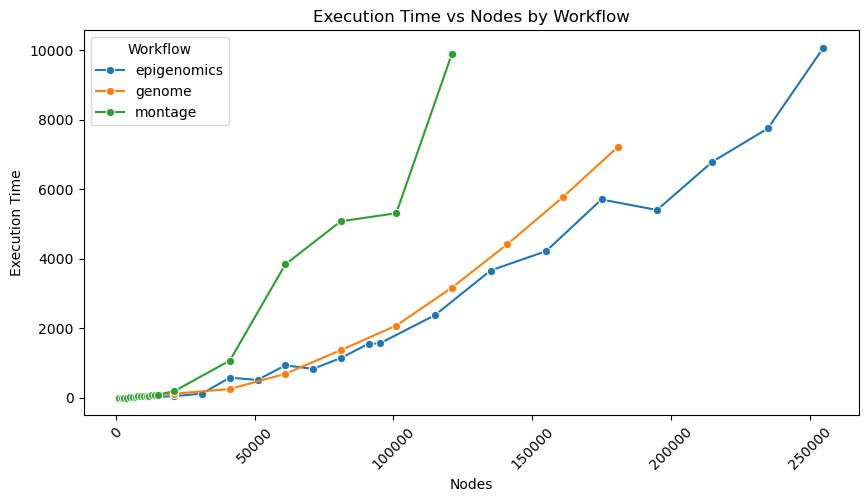

In [15]:
plt.figure(figsize=(10,5))

sns.lineplot(data=df, x='nodes', y='exec_time', hue='workflow', marker='o')

plt.title('Execution Time vs Nodes by Workflow')
plt.xlabel('Nodes')
plt.ylabel('Execution Time')
plt.legend(title='Workflow')
plt.xticks(rotation=45)
plt.show()

Attempting to see what big O notation fits each case.

In [16]:
import numpy as np
from scipy.optimize import curve_fit

In [17]:
# Define power-law function: O(t^p)
def power_law(t, p, c):
    return c * np.power(t, p)

# Define exponential function: O(e^(b*t))
def exponential_fit(t, a, b):
    return a * np.exp(b * t)

# Define n log n function: O(n log n)
def n_log_n_fit(t, c):
    return c * t * np.log(t)

# Function to fit complexity models and generate plots
def fit_and_plot_complexity(df, workflow_name):
    graph_sizes = df[df["workflow"] == workflow_name]["nodes"]
    exec_times = df[df["workflow"] == workflow_name]["exec_time"]

    # Ensure enough data points for fitting
    if len(graph_sizes) < 3:
        print(f"Skipping {workflow_name}: Insufficient data for fitting.")
        return None

    # Fit power-law model: O(t^p)
    try:
        power_params, _ = curve_fit(power_law, graph_sizes, exec_times, p0=[1, 1], maxfev=5000)
        estimated_p, estimated_c = power_params
        power_predictions = power_law(graph_sizes, estimated_p, estimated_c)
        power_mse = np.mean((exec_times - power_predictions) ** 2)
        power_law_str = f"{estimated_c} O(t^{estimated_p:.2f})"
    except RuntimeError:
        power_mse = np.inf  # Set to a high value if fitting fails
        power_predictions = np.full_like(graph_sizes, np.nan)
        power_law_str = "Fit Failed"

    # Fit exponential model: O(e^(b*t))
    try:
        exp_params, _ = curve_fit(exponential_fit, graph_sizes, exec_times, p0=[1, 0.00001], maxfev=5000)
        estimated_a, estimated_b = exp_params
        exp_predictions = exponential_fit(graph_sizes, estimated_a, estimated_b)
        exp_mse = np.mean((exec_times - exp_predictions) ** 2)
        exp_law_str = f"{estimated_a} O(e^({estimated_b:.6f} * t))"
    except RuntimeError:
        exp_mse = np.inf
        exp_predictions = np.full_like(graph_sizes, np.nan)
        exp_law_str = "Fit Failed"

    # Fit O(t log t) model
    try:
        nlogn_params, _ = curve_fit(n_log_n_fit, graph_sizes, exec_times, p0=[1], maxfev=5000)
        estimated_c = nlogn_params[0]
        nlogn_predictions = n_log_n_fit(graph_sizes, estimated_c)
        nlogn_mse = np.mean((exec_times - nlogn_predictions) ** 2)
        nlogn_law_str = f"{estimated_c} O(t log t)"
    except RuntimeError:
        nlogn_mse = np.inf
        nlogn_predictions = np.full_like(graph_sizes, np.nan)
        nlogn_law_str = "Fit Failed"

    # Determine the best fit based on MSE
    mse_values = {
        "Power Law": power_mse,
        "Exponential": exp_mse,
        "t log t": nlogn_mse
    }
    best_fit = min(mse_values, key=mse_values.get)  # Select model with lowest MSE

    # 📊 PLOT THE RESULTS
    plt.figure(figsize=(10, 6))
    plt.scatter(graph_sizes, exec_times, label="Actual Data", color="black", marker="o")
    plt.plot(graph_sizes, power_predictions, label=power_law_str, linestyle="--", color="blue")
    plt.plot(graph_sizes, exp_predictions, label=exp_law_str, linestyle="--", color="red")
    plt.plot(graph_sizes, nlogn_predictions, label=nlogn_law_str, linestyle="--", color="green")

    plt.xlabel("Graph Size (Number of Nodes)")
    plt.ylabel("Execution Time (seconds)")
    plt.title(f"Complexity Fit for {workflow_name} Workflow")
    plt.legend()
    plt.grid(True)
    plt.show()

    return {
        "workflow": workflow_name,
        "best_fit": best_fit,
        "power_law_O": power_law_str,
        "exponential_O": exp_law_str,
        "n_log_n_O": nlogn_law_str
    }

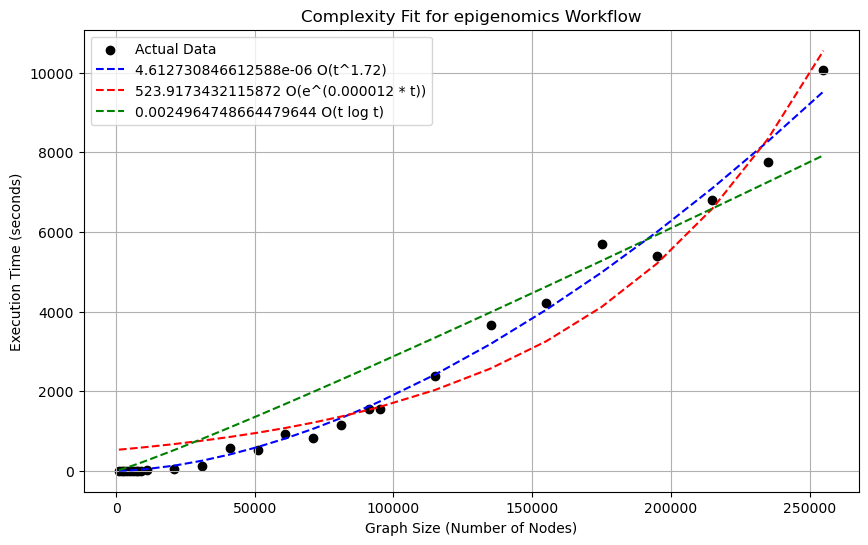

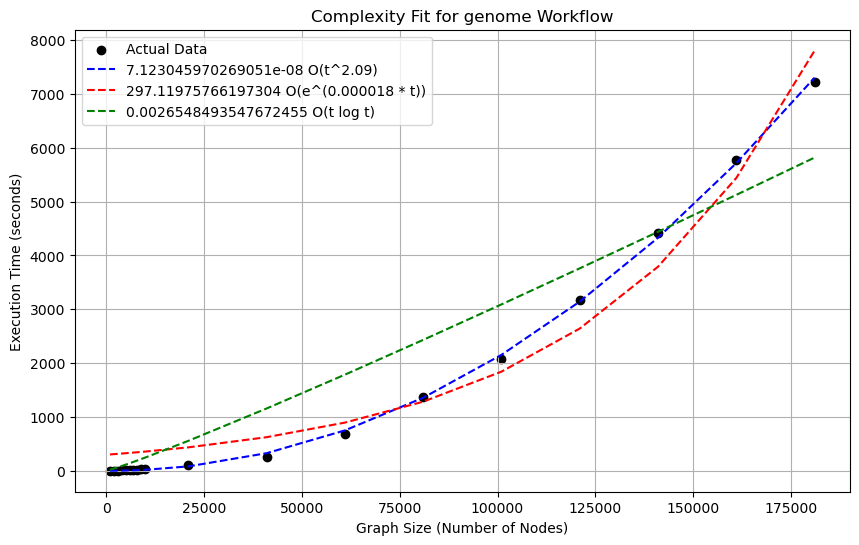

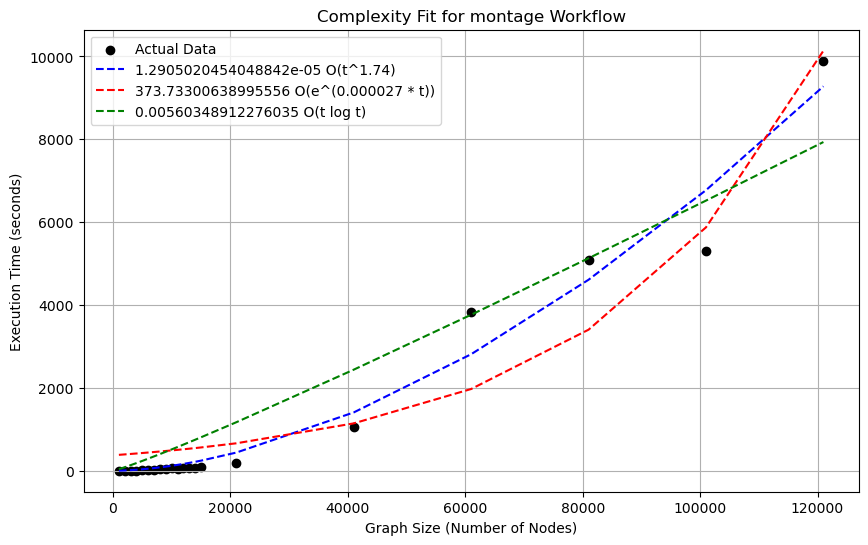

   workflow  best_fit                      power_law_O                          exponential_O                        n_log_n_O
epigenomics Power Law  4.612730846612588e-06 O(t^1.72)  523.9173432115872 O(e^(0.000012 * t)) 0.0024964748664479644 O(t log t)
     genome Power Law  7.123045970269051e-08 O(t^2.09) 297.11975766197304 O(e^(0.000018 * t)) 0.0026548493547672455 O(t log t)
    montage Power Law 1.2905020454048842e-05 O(t^1.74) 373.73300638995556 O(e^(0.000027 * t))   0.00560348912276035 O(t log t)


In [18]:
complexity_results = [fit_and_plot_complexity(df, workflow) for workflow in df["workflow"].unique()]
# Convert results to a Pandas DataFrame
df_complexity = pd.DataFrame([r for r in complexity_results if r is not None])

# Print results
print(df_complexity.to_string(index=False))

In [19]:
import json
import numpy as np
import pandas as pd
import re
import argparse
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define O(t log t) function
def t_log_t_fit(t, c):
    return c * t * np.log(t)


def t_linear_fit(t, c):
    return c * t

# Define O(t^2) function
def t_squared_fit(t, c):
    return c * np.power(t, 2)

# Define O(t^3) function
def t_cubed_fit(t, c):
    return c * np.power(t, 3)


def t_fourth_power_fit(t, c):
    return c * np.power(t, 4)


def t_exponential_fit(t, c):
    return c * np.power(2, t)

# Function to fit and compare models
def fit_and_plot_complexity(df, workflow_name):
    graph_sizes = df[df["workflow"] == workflow_name]["nodes"]
    exec_times = df[df["workflow"] == workflow_name]["exec_time"]

    # Ensure enough data points for fitting
    if len(graph_sizes) < 3:
        print(f"Skipping {workflow_name}: Insufficient data for fitting.")
        return None

    # Ensure enough data points for fitting
    if len(graph_sizes) < 3:
        print(f"Skipping {workflow_name}: Insufficient data for fitting.")
        return None

    # Fit O(t log t) model
    try:
        tlogt_params, _ = curve_fit(t_log_t_fit, graph_sizes, exec_times, p0=[1], maxfev=5000)
        estimated_c_tlogt = tlogt_params[0]
        tlogt_predictions = t_log_t_fit(graph_sizes, estimated_c_tlogt)
        tlogt_mse = np.mean((exec_times - tlogt_predictions) ** 2)
        tlogt_str = f"O(t log t) (c={estimated_c_tlogt:.6f})"
    except RuntimeError:
        tlogt_mse = np.inf
        tlogt_predictions = np.full_like(graph_sizes, np.nan)
        tlogt_str = "Fit Failed"

    # Fit O(t^2) model
    try:
        t2_params, _ = curve_fit(t_squared_fit, graph_sizes, exec_times, p0=[1], maxfev=5000)
        estimated_c_t2 = t2_params[0]
        t2_predictions = t_squared_fit(graph_sizes, estimated_c_t2)
        t2_mse = np.mean((exec_times - t2_predictions) ** 2)
        t2_str = f"O(t^2) (c={estimated_c_t2:.6f})"
    except RuntimeError:
        t2_mse = np.inf
        t2_predictions = np.full_like(graph_sizes, np.nan)
        t2_str = "Fit Failed"

    # Fit O(t^3) model
    try:
        t3_params, _ = curve_fit(t_cubed_fit, graph_sizes, exec_times, p0=[1], maxfev=5000)
        estimated_c_t3 = t3_params[0]
        t3_predictions = t_cubed_fit(graph_sizes, estimated_c_t3)
        t3_mse = np.mean((exec_times - t3_predictions) ** 2)
        t3_str = f"O(t^3) (c={estimated_c_t3:.6f})"
    except RuntimeError:
        t3_mse = np.inf
        t3_predictions = np.full_like(graph_sizes, np.nan)
        t3_str = "Fit Failed"

    # Determine the best fit based on MSE
    mse_values = {
        "T log T": tlogt_mse,
        "T^2": t2_mse,
        "T^3": t3_mse
    }
    best_fit = min(mse_values, key=mse_values.get)  # Select model with lowest MSE

    # 📊 PLOT THE RESULTS
    plt.figure(figsize=(10, 6))
    plt.scatter(graph_sizes, exec_times, label="Actual Data", color="black", marker="o")
    plt.plot(graph_sizes, tlogt_predictions, label=tlogt_str, linestyle="--", color="blue")
    plt.plot(graph_sizes, t2_predictions, label=t2_str, linestyle="--", color="red")
    plt.plot(graph_sizes, t3_predictions, label=t3_str, linestyle="--", color="green")

    plt.xlabel("Graph Size (Number of Nodes)")
    plt.ylabel("Execution Time (seconds)")
    plt.title(f"Complexity Fit for {workflow_name} Workflow")
    plt.legend()
    plt.grid(True)
    plt.show()

    return {
        "workflow": workflow_name,
        "best_fit": best_fit,
        "t_log_t_O": tlogt_str,
        "t_squared_O": t2_str,
        "t_cubed_O": t3_str
    }


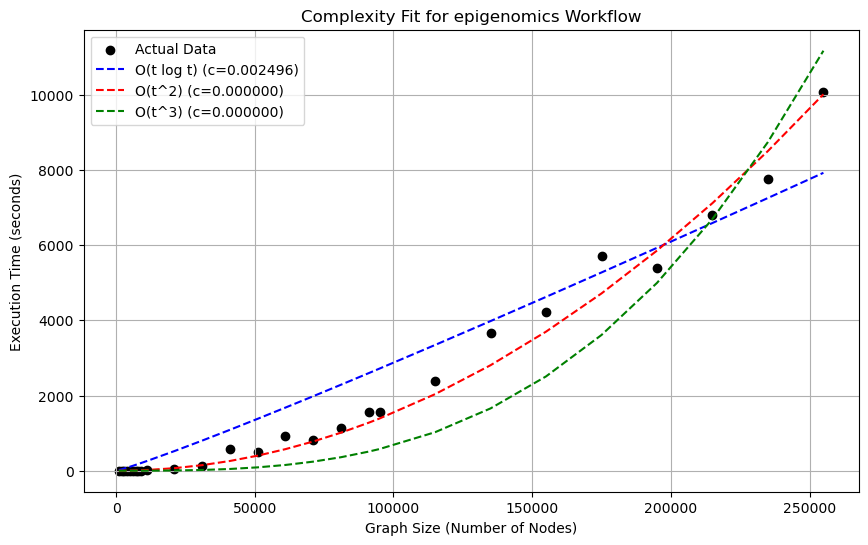

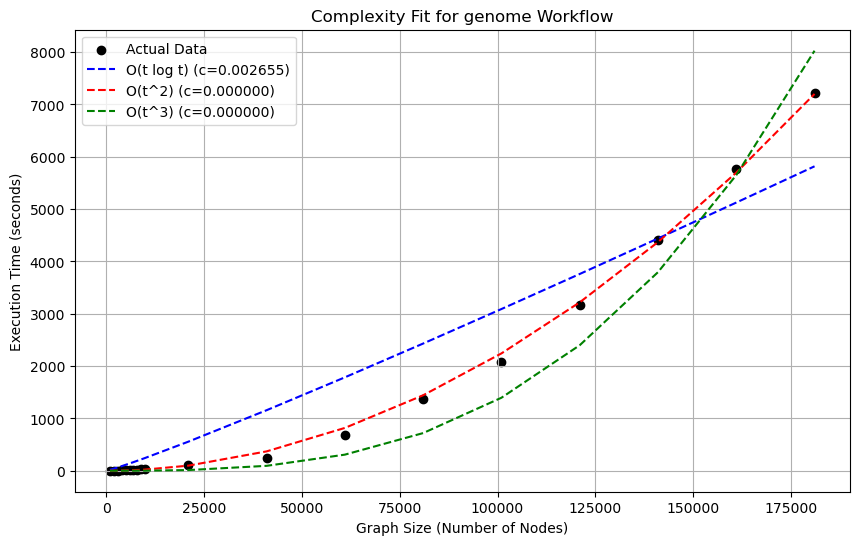

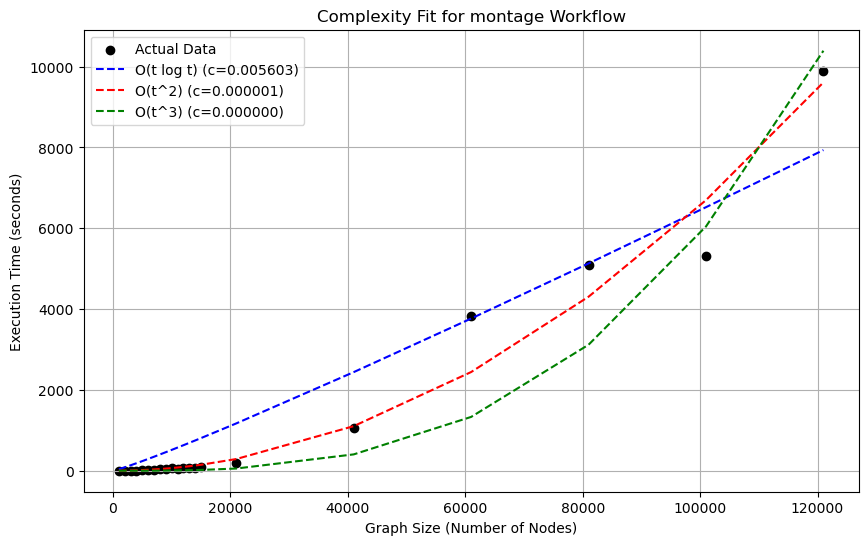

   workflow best_fit               t_log_t_O         t_squared_O           t_cubed_O
epigenomics      T^2 O(t log t) (c=0.002496) O(t^2) (c=0.000000) O(t^3) (c=0.000000)
     genome      T^2 O(t log t) (c=0.002655) O(t^2) (c=0.000000) O(t^3) (c=0.000000)
    montage      T^2 O(t log t) (c=0.005603) O(t^2) (c=0.000001) O(t^3) (c=0.000000)


In [20]:
complexity_results = [fit_and_plot_complexity(df, workflow) for workflow in df["workflow"].unique()]
# Convert results to a Pandas DataFrame
df_complexity = pd.DataFrame([r for r in complexity_results if r is not None])

# Print results
print(df_complexity.to_string(index=False))

In [21]:
import json
import numpy as np
import pandas as pd
import re
import argparse
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define complexity functions
def t_linear_fit(t, c):
    return c * t

def t_log_t_fit(t, c):
    return c * t * np.log(t)

def t_squared_fit(t, c):
    return c * np.power(t, 2)

def t_cubed_fit(t, c):
    return c * np.power(t, 3)

def t_fourth_power_fit(t, c):
    return c * np.power(t, 4)

def t_exponential_fit(t, c):
    return c * np.power(2, t)

# Function to fit and compare models
def fit_and_plot_complexity(df, workflow_name):
    graph_sizes = df[df["workflow"] == workflow_name]["nodes"]
    exec_times = df[df["workflow"] == workflow_name]["exec_time"]

    # Ensure enough data points for fitting
    if len(graph_sizes) < 3:
        print(f"Skipping {workflow_name}: Insufficient data for fitting.")
        return None

    # Dictionary to store fit results
    fit_results = {}

    # Complexity functions to test
    functions = {
        "T": t_linear_fit,
        "T log T": t_log_t_fit,
        "T^2": t_squared_fit,
        "T^3": t_cubed_fit,
        # "T^4": t_fourth_power_fit,
        # "2^T": t_exponential_fit
    }

    # Fit models and calculate MSE
    for label, func in functions.items():
        try:
            params, _ = curve_fit(func, graph_sizes, exec_times, p0=[1], maxfev=5000)
            estimated_c = params[0]
            predictions = func(graph_sizes, estimated_c)
            mse = np.mean((exec_times - predictions) ** 2)
            fit_results[label] = {
                "c": estimated_c,
                "mse": mse,
                "predictions": predictions,
                "equation": f"O({label}) (c={estimated_c:.2e}) (mse={mse:.0f})"
            }
        except RuntimeError:
            fit_results[label] = {
                "c": None,
                "mse": np.inf,
                "predictions": np.full_like(graph_sizes, np.nan),
                "equation": "Fit Failed"
            }

    # Determine the best fit based on MSE
    best_fit = min(fit_results, key=lambda x: fit_results[x]["mse"])

    # 📊 PLOT THE RESULTS
    plt.figure(figsize=(10, 6))
    plt.scatter(graph_sizes, exec_times, label="Actual Data", color="black", marker="o")

    colors = ["blue", "red", "green", "purple", "orange", "brown"]
    for (label, result), color in zip(fit_results.items(), colors):
        plt.plot(graph_sizes, result["predictions"], label=result["equation"], linestyle="--", color=color)

    plt.xlabel("Graph Size (Number of Nodes)")
    plt.ylabel("Execution Time (seconds)")
    plt.title(f"Complexity Fit for {workflow_name} Workflow")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Return results
    return {
        "workflow": workflow_name,
        "best_fit": best_fit,
        **{label: result["equation"] for label, result in fit_results.items()}
    }

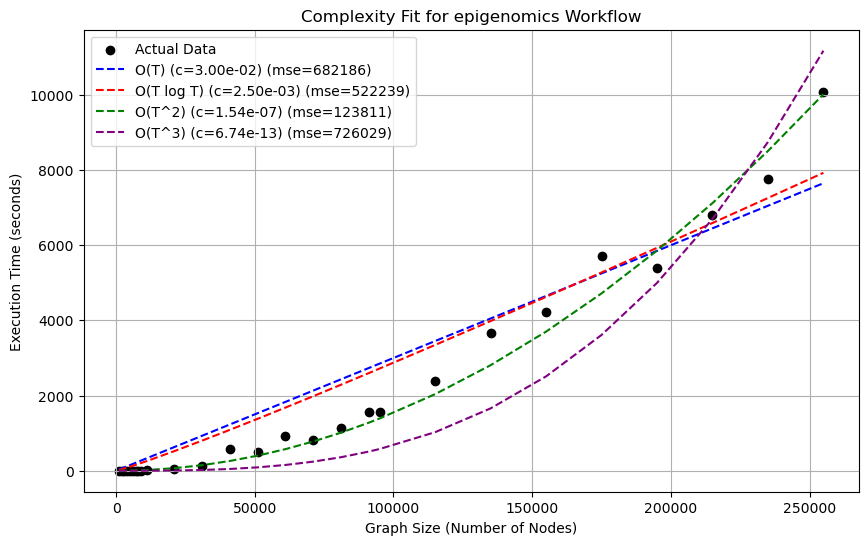

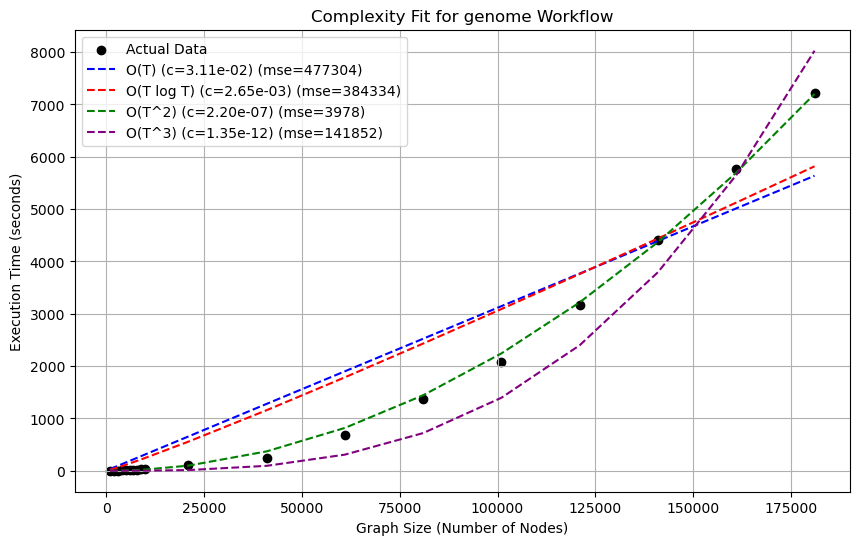

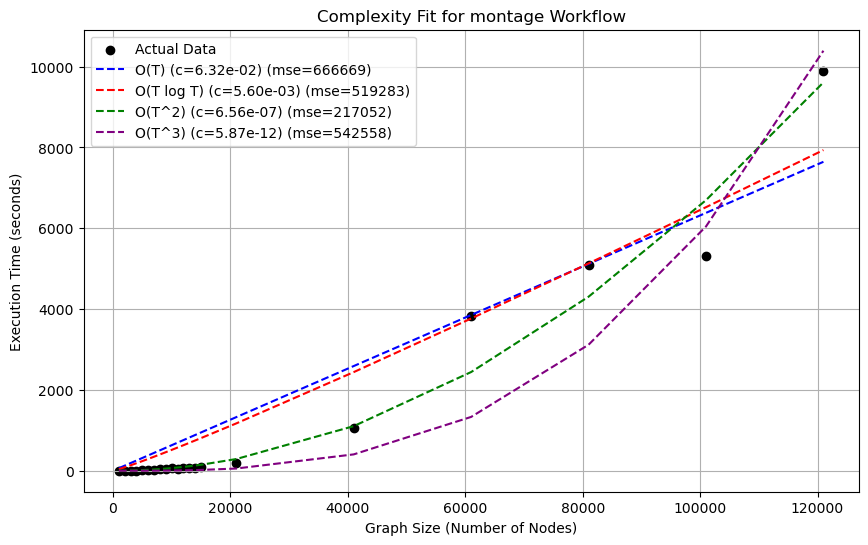

   workflow best_fit                              T                              T log T                              T^2                              T^3
epigenomics      T^2 O(T) (c=3.00e-02) (mse=682186) O(T log T) (c=2.50e-03) (mse=522239) O(T^2) (c=1.54e-07) (mse=123811) O(T^3) (c=6.74e-13) (mse=726029)
     genome      T^2 O(T) (c=3.11e-02) (mse=477304) O(T log T) (c=2.65e-03) (mse=384334)   O(T^2) (c=2.20e-07) (mse=3978) O(T^3) (c=1.35e-12) (mse=141852)
    montage      T^2 O(T) (c=6.32e-02) (mse=666669) O(T log T) (c=5.60e-03) (mse=519283) O(T^2) (c=6.56e-07) (mse=217052) O(T^3) (c=5.87e-12) (mse=542558)


In [22]:
for scheduler in df.scheduler.unique():
    

    complexity_results = [fit_and_plot_complexity(df, workflow) for workflow in df["workflow"].unique()]
    # Convert results to a Pandas DataFrame
    df_complexity = pd.DataFrame([r for r in complexity_results if r is not None])
    
    # Print results
    print(df_complexity.to_string(index=False))

In [23]:
# df.exec_time.max()


In [24]:
# df[(df["exec_time"] > 2000)]

soykb takes wayyyy too long. Better off removing from this test for the sake of saving time

In [25]:
# df = df[(df["exec_time"] < 3000) & (df["exec_time"] > 3)]